# 動的プログラミング

* 多段決定問題のグラフの記述
    * Pythonの辞書を利用 --- 辞書とは一種の連想配列。`key:value`というペアを記憶。ここで key も value も任意のオブジェクトでよい
    * `var = { key_1 : val_1, key_2 : val_2, ... }` によって変数`var`に辞書が記憶される。
    * `var[key_1]`によって`val_1`が取り出される。また`var[key_1]=new_val`とすることで値の書き換えが行われる

* 変数`states`にグラフを記憶。`start`状態は`s11, s12, s13`状態への道を持ち、それぞれ5, 0, 3というコストがある。

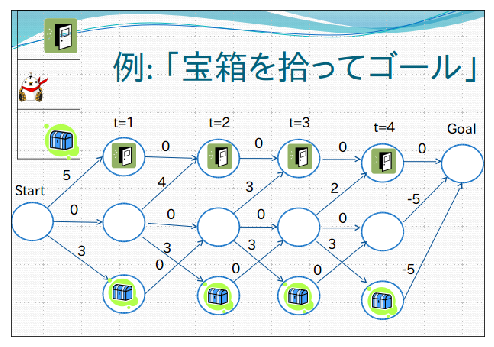

In [4]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
fig = cv2.imread("fig5-5.png")
plt.figure(figsize=(12,6))
plt.imshow(cv2.cvtColor(fig,cv2.COLOR_BGR2RGB))
plt.yticks([]), plt.xticks([])
plt.show()


In [10]:
states = {'start':{'s11':5,'s12':0,'s13':3},
	's11':{'s21':0}, 
	's12':{'s21':4, 's22':0, 's23':3},
	's13':{'s22':0},
	's21':{'s31':0}, 
	's22':{'s31':3, 's32':0,'s33':3},
	's23':{'s32':0},
	's31':{'s41':0}, 
	's32':{'s41':2, 's42':0, 's43':3},
	's33':{'s42':0},
	's41':{'goal':0}, 
	's42':{'goal':-5},
	's43':{'goal':-5} }

maps = [['start'],['s11','s12','s13'],
	['s21','s22','s23'], ['s31','s32','s33'],
	['s41','s42','s43'],['goal'] ]



Algorithm 5.1　動的計画法(p.63)
1. `for t=1 to T do`<BR>
    　　　$F_t(s_t)=\max_{s_{t-1}}[T_{t-1})s_{t-1}) + h_t(s_{t-1},s_t)]$<BR>
   　　　 その最大値を与える$s_{t-1}$を$\hat{s}_{t-1}(s_t)$としてメモリに保持<BR>
`end for`
2. $F_T(s_T)$を最大にする$s_T$の値$s_T^*$を探索し、$J^* \leftarrow F_T(s_T^*)$ (つまり$F_T(s_T)$の最大値)とする
3. `for t = T-1 to 1 do`<BR>
    　　　$s^*_t = \hat{s}_t(s_{t+1}^*)$を計算する<BR>
`end for`
4. `return` 経路($s_1^*,s_2^*,\ldots,s_T^*)$および$J^*$を返す

In [35]:
class DynamicProgramming(object):
    '''
        動的プログラミング
            関連する関数をパッケージにしただけ
    '''
    def __init__(self,verbose=False):
        self.INF=-9999999  # 最大コスト
        self.verbose=verbose
        pass
    
    def h(self,s1,s2):
        nodes = self.states[s1]
        if (s2 in nodes):		# nodes.has_key(s2)
              return nodes[s2]
        return self.INF

    def calcMax(self, s, pres,f):
        if self.verbose:
            print ("in calcMax: ",s,pres )
        lst = sorted([(f[x]+self.h(x,s),x) for x in pres],reverse=True)   # sort in Large2Small
        return lst[0]

    def dp(self, states, maps): # initialize
        self.states=states
        T = len(maps)
        f = {x:0 for x in maps[0]}  # start nodes
        # set the initial cost = 0
        sHat = { }   # for memo
        # step 1 -  3
        for t in range(1,T):
          if self.verbose:
                print ("t=",t )
          for s in maps[t]:
            if self.verbose:
                print( "\ts=",s )
            (f[s],sHat[s]) = self.calcMax(s,maps[t-1],f)
            if self.verbose:
                    print ("f(s)=",f[s] )
        if self.verbose:
                print (f)
        # step 4
        goalNodes = sorted([(f[x], x) for x in maps[-1]],reverse=True) # 'goal's
        jStar=goalNodes[0][0]
        # step 5
        node = goalNodes[0][1]
        path = [node]
        while  (node not in maps[0]): # maps[0] == 'start'
          node = sHat[node]
          path.insert(0,node)
        return (jStar, path)


In [33]:
trial = DynamicProgramming()

trial.dp(states,maps)

(6, ['start', 's13', 's22', 's31', 's41', 'goal'])

In [34]:
trial2 = DynamicProgramming(verbose=True)

trial2.dp(states,maps)

t= 1
	s= s11
in calcMax:  s11 ['start']
f(s)= 5
	s= s12
in calcMax:  s12 ['start']
f(s)= 0
	s= s13
in calcMax:  s13 ['start']
f(s)= 3
t= 2
	s= s21
in calcMax:  s21 ['s11', 's12', 's13']
f(s)= 5
	s= s22
in calcMax:  s22 ['s11', 's12', 's13']
f(s)= 3
	s= s23
in calcMax:  s23 ['s11', 's12', 's13']
f(s)= 3
t= 3
	s= s31
in calcMax:  s31 ['s21', 's22', 's23']
f(s)= 6
	s= s32
in calcMax:  s32 ['s21', 's22', 's23']
f(s)= 3
	s= s33
in calcMax:  s33 ['s21', 's22', 's23']
f(s)= 6
t= 4
	s= s41
in calcMax:  s41 ['s31', 's32', 's33']
f(s)= 6
	s= s42
in calcMax:  s42 ['s31', 's32', 's33']
f(s)= 6
	s= s43
in calcMax:  s43 ['s31', 's32', 's33']
f(s)= 6
t= 5
	s= goal
in calcMax:  goal ['s41', 's42', 's43']
f(s)= 6
{'start': 0, 's11': 5, 's12': 0, 's13': 3, 's21': 5, 's22': 3, 's23': 3, 's31': 6, 's32': 3, 's33': 6, 's41': 6, 's42': 6, 's43': 6, 'goal': 6}


(6, ['start', 's13', 's22', 's31', 's41', 'goal'])

## 最適探索との比較
最適探索ではコスト最小の経路を探すため、上のグラフにおいてコストをすべて(10-元のコスト）として扱う

In [36]:
class OptimalSearch_R(object):
    """ 最適探索器, 経路表示つき
        パラメタ
        ------
            verbose : メッセージ表示ありかなしか
    """         
    def __init__(self, verbose=True):
        self.verbose = verbose

    def search(self, statesMap, start, goal):
        """ 最適探索
            パラメタ
            -----
                statesMap : 辞書 キーに対する値はそのキーに接続する状態とコストのタプルを要素とするリスト
                start : キー(状態)
                goal : キー(状態)
            戻り値: 
                goalに到達できれば True, そうでなければ False
        """
        # openは探索対象の状態の記録用, 実態は状態とコストのタプルのリスト
        closed = dict()         # closedは探索済み用の辞書、キーは状態、値はコスト
        cost = 0                # スタート地点のコストは0とする
        open=[(cost,start,start)]       # open は探索すべきコスト、状態、直前の状態のタプルを要素とするリスト
        while open:     # 探索すべき状態があれば以下を繰り返す
            if self.verbose :
                    print ('open = ',list(reversed(open)), '\t closed =', closed)  # openリストとclosedリストの表示
            cost, s, prec = open.pop()    # openリストから最後の要素(コストと状態,直前状態のタプル)を取り出す.
            if self.verbose:
                print(s, 'is visited')
            closed[s] = (cost, prec)          # closed辞書に状態をコストと直前の状態を共に登録
            #
            if (s == goal):			# 目標状態に到達
                if (self.verbose) : 
                    print('reached the goal. closed = ', closed)
                return self.showRoute(closed,start,goal)
            open = sorted(self.append_to_open(open,s,closed,cost, statesMap),reverse=True)   # あらたなopenリストを作り並び替え
        return False
    ###
    def append_to_open(self, open, state, closed, cost, stateMap):
        """
            オープンリストに新たな状態を追加する
            パラメタ
            -----
                open : オープンリスト：探索対象の状態とコストのタプルのリスト
                state : 状態
                closed : 探索済みの状態とコストを記録した辞書
                cost : startからstateまでのその時点での累積コスト
                statesMap : 辞書 キーに対する値はそのキーに接続する状態とコストのタプルを要素とするリスト
            戻り値: 
                コストと状態のタプルを要素とするリスト
        """
        new_open = { s:(c,prec) for (c,s,prec) in open}    # 探索対象の状態とそのコストの辞書
        adjacents = stateMap[state].copy()      # state状態に接続する状態を取り出す
        #
        while adjacents :
             next_state, added_cost = adjacents.pop()    # 状態を取り出す(正確には状態とコストのタプル)
             if next_state not in closed:       #  closed に登録されていなければ
                new_cost = cost + added_cost         # コストの計算
                if next_state not in  new_open:    # open に登録されていなければ
                    new_open[next_state] = (new_cost, state)         # その状態とコストを登録
                elif new_open[next_state][0] > new_cost:     # openにあった場合でかつこちらの経路の方がコストが小さい場合
                    new_open[next_state] = (new_cost,state)        # コストを書き換える
        return [(c,s,p) for (s,(c,p)) in new_open.items()]  # 辞書からリストに変換---要素も(コスト、状態)のタプルに変換
    #
    def showRoute(self, result, start, goal):
        """ 経路表示
            パラメタ
            -----
                result :　辞書、値は (コスト1, node)型タプル
                start, goal : 状態
            戻り値
            -----
                経路の状態のリスト
        """
        node=goal
        route = []
        if (self.verbose) :
                print ('cost = ',result[goal][0] )
        while (node != start):
          route.append(node)
          _,node = result[node]
        route.append(start)
        route.reverse()
        if (self.verbose) :
           for x in route[:-1]:
                 print ( x,'=(',result[x][0],') -> ',end="")
           print ( goal, '=(',result[goal][0],')' )
        return route


In [55]:
statesMap = {x:[(y,10-states[x][y]) for y in states[x].keys()] for x in states.keys() }

In [56]:
statesMap

{'s11': [('s21', 10)],
 's12': [('s21', 6), ('s22', 10), ('s23', 7)],
 's13': [('s22', 10)],
 's21': [('s31', 10)],
 's22': [('s31', 7), ('s32', 10), ('s33', 7)],
 's23': [('s32', 10)],
 's31': [('s41', 10)],
 's32': [('s41', 8), ('s42', 10), ('s43', 7)],
 's33': [('s42', 10)],
 's41': [('goal', 10)],
 's42': [('goal', 15)],
 's43': [('goal', 15)],
 'start': [('s11', 5), ('s12', 10), ('s13', 7)]}

In [57]:
opt2=OptimalSearch_R()
opt2.search(statesMap,'start','goal')

open =  [(0, 'start', 'start')] 	 closed = {}
start is visited
open =  [(5, 's11', 'start'), (7, 's13', 'start'), (10, 's12', 'start')] 	 closed = {'start': (0, 'start')}
s11 is visited
open =  [(7, 's13', 'start'), (10, 's12', 'start'), (15, 's21', 's11')] 	 closed = {'start': (0, 'start'), 's11': (5, 'start')}
s13 is visited
open =  [(10, 's12', 'start'), (15, 's21', 's11'), (17, 's22', 's13')] 	 closed = {'start': (0, 'start'), 's11': (5, 'start'), 's13': (7, 'start')}
s12 is visited
open =  [(15, 's21', 's11'), (17, 's22', 's13'), (17, 's23', 's12')] 	 closed = {'start': (0, 'start'), 's11': (5, 'start'), 's13': (7, 'start'), 's12': (10, 'start')}
s21 is visited
open =  [(17, 's22', 's13'), (17, 's23', 's12'), (25, 's31', 's21')] 	 closed = {'start': (0, 'start'), 's11': (5, 'start'), 's13': (7, 'start'), 's12': (10, 'start'), 's21': (15, 's11')}
s22 is visited
open =  [(17, 's23', 's12'), (24, 's31', 's22'), (24, 's33', 's22'), (27, 's32', 's22')] 	 closed = {'start': (0, 'start')

['start', 's13', 's22', 's31', 's41', 'goal']